<a href="https://colab.research.google.com/github/Divya-d14/Customer-Segmentation-using-RFM-analysis/blob/main/CustomerSegmentationUsingRFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Segmentation Using RFM Analysis**



### **Overview**  

This project focuses on analyzing transactional data from a UK-based online retail business, capturing all transactions between 01/12/2010 and 09/12/2011.  

The primary goal is to segment customers using the **Recency, Frequency, and Monetary (RFM)** model—a widely adopted framework for understanding customer behavior and optimizing personalized marketing efforts.  

### **Approach:**
- Data Understanding
- Data Cleaning
- Data Preparation
- Customer Segmentation Modeling
- Insights and Recommendations

## **Data Understanding**

In [34]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Use the raw URL from GitHub to read the Excel file
url = 'https://github.com/Divya-d14/Customer-Segmentation-using-RFM-analysis/raw/main/Online%20Retail.xlsx'

# read the dataset
retail_df = pd.read_excel(url, engine='openpyxl')

# Display the first few rows of the DataFrame
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
# basics of the df
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [37]:
round(retail_df.isnull().sum()/len(retail_df)*100,2)

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [38]:
retail_df.duplicated().any()

True

## **Data Cleaning**

In [39]:
# drop all rows having missing values since customerid is unique and can not be imputed
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [40]:
# Drop rows where 'InvoiceNo' contains "C" (cancelled)
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains("C", na=False)]
retail_df.shape

(397924, 8)

In [41]:
duplicates = retail_df[retail_df.duplicated()]
display(duplicates)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [42]:
retail_df[(retail_df['StockCode']==21866) & (retail_df['CustomerID']==17908.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [43]:
retail_df[(retail_df['StockCode']==22327) & (retail_df['CustomerID']==17920.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [44]:
#Dropping the duplicates
retail_df.drop_duplicates(inplace=True)
retail_df.duplicated().any()

False

In [45]:
#changing the datatype to str
retail_df['CustomerID']=retail_df['CustomerID'].astype(str)

In [46]:
retail_df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [47]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


**Attribute Information:**  

| Column       | Description                                                                                      | Type                                           |
|--------------|--------------------------------------------------------------------------------------------------|------------------------------------------------|
| InvoiceNo    | Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. | Nominal                                       |
| StockCode    | Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.       | Nominal                                       |
| Description  | Product (item) name.                                                                            | Nominal                                       |
| Quantity     | The quantities of each product (item) per transaction.                                          | Numeric                                       |
| InvoiceDate  | Invoice Date and time. The day and time when each transaction was generated.                     | Numeric                                       |
| UnitPrice    | Unit price. Product price per unit in sterling.                                                 | Numeric                                       |
| CustomerID   | Customer number. A 5-digit integral number uniquely assigned to each customer.                  | Nominal                                       |
| Country      | Country name. The name of the country where each customer resides.                              | Nominal                                       |


In [48]:
retail_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,392732.0,13.153718,1.0,2.0,6.0,12.0,80995.0,181.58842
InvoiceDate,392732,2011-07-10 19:15:24.576301568,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 12:02:00,2011-10-20 12:53:00,2011-12-09 12:50:00,NaN
UnitPrice,392732.0,3.125596,0.0,1.25,1.95,3.75,8142.75,22.240725


In [49]:
retail_df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
CustomerID,392732,4339,17841.0,7676
Country,392732,37,United Kingdom,349227


In [50]:
retail_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
135842,547912,22894,TABLECLOTH RED APPLES DESIGN,1,2011-03-28 12:27:00,9.95,18010.0,United Kingdom
420881,572913,71279,PINK GLASS CANDLEHOLDER,3,2011-10-26 16:21:00,2.95,15993.0,United Kingdom
107255,545419,22802,FAUX FUR CHOCOLATE THROW,1,2011-03-02 14:16:00,19.95,15104.0,United Kingdom
410441,572103,21367,MIRRORED WALL ART GENTS,2,2011-10-20 15:57:00,0.75,17571.0,United Kingdom
539138,581433,22283,6 EGG HOUSE PAINTED WOOD,2,2011-12-08 15:54:00,7.95,14911.0,EIRE
369335,569026,22082,RIBBON REEL STRIPES DESIGN,10,2011-09-30 10:18:00,1.65,16101.0,United Kingdom
445180,574826,20760,GARDEN PATH POCKET BOOK,3,2011-11-07 10:58:00,0.85,15870.0,United Kingdom
159246,550331,85203,HANGING WOOD AND FELT BUTTERFLY,4,2011-04-17 13:43:00,0.42,15555.0,United Kingdom
466976,576339,21676,FLOWERS STICKERS,1,2011-11-14 15:27:00,1.63,14096.0,United Kingdom
529486,580731,20699,MOUSEY LONG LEGS SOFT TOY,1,2011-12-05 17:36:00,2.55,17383.0,United Kingdom


## **Data Preparation**

- **R** (Recency): Number of days since last purchase
- **F** (Frequency): Number of tracsactions
- **M** (Monetary): Total amount of transactions (revenue contributed)

In [51]:
#Adding new column amount to calculate total amount of transactions
retail_df["Amount"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [52]:
# Get the latest invoice date from the dataset
now = retail_df.InvoiceDate.max()


# Group data by CustomerID and calculate RFM metrics
rfm = retail_df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda x: (now - x.max()).days,  # recency
        'InvoiceNo': 'nunique',                        # frequency
        'Amount': 'sum'                                # monetary
    }
)
rfm.reset_index(inplace=True)

# Rename the columns for clarity
rfm.columns = ['CustomerID', 'recency', 'frequency', 'monetary']

# Display the first few rows of the RFM DataFrame
rfm.head()


,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [53]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,91.518322,100.009747,0.0,17.000,50.00,141.000,373.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.000,210.00
monetary,4339.0,2048.215924,8984.248352,0.0,306.455,668.56,1660.315,280206.02


<Axes: ylabel='recency'>

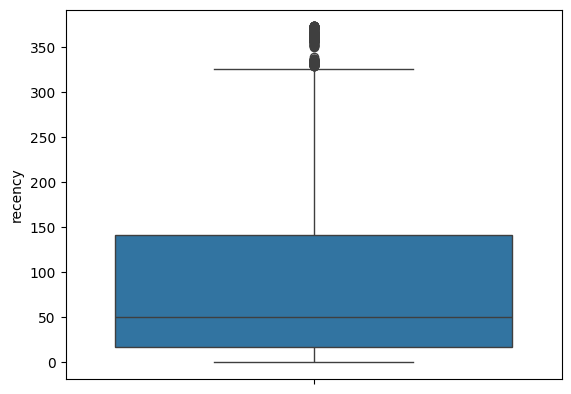

In [54]:
sns.boxplot(rfm['recency'])

<Axes: ylabel='frequency'>

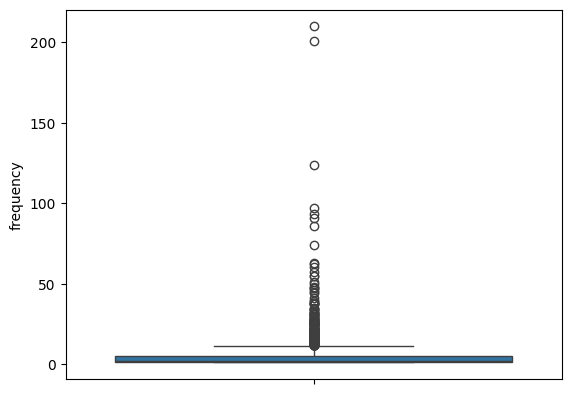

In [55]:
sns.boxplot(rfm['frequency'])

<Axes: ylabel='monetary'>

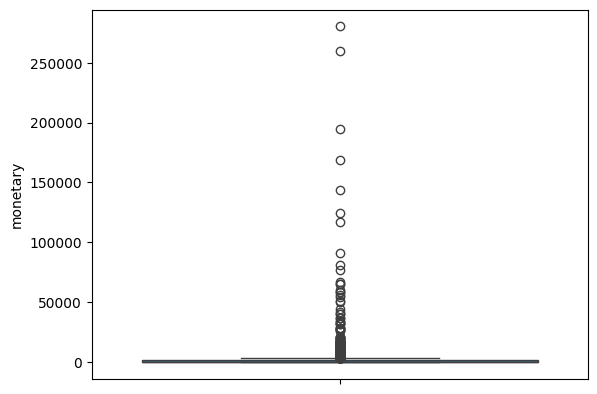

In [56]:
sns.boxplot(rfm['monetary'])

In [57]:
#treating outliers
columns = rfm.select_dtypes(include=['number']).columns.tolist()
lower_bound = rfm[columns].quantile(0.05)       #calcualting the lower bound
upper_bound = rfm[columns].quantile(0.95)       #calcualting the upper bound
IQR = upper_bound - lower_bound                 #calcualting the IQR

for col in columns:
  rfm = rfm[(rfm[col] >= lower_bound[col] - 1.5*IQR[col]) & (rfm[col] <= upper_bound[col] + 1.5*IQR[col])]

rfm.shape


(4263, 4)

In [58]:
#scaling
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = pd.DataFrame(scaler.fit_transform(rfm[columns]))

#renaming columns
rfm_df_scaled.columns = ['recency', 'frequency', 'monetary']
rfm_df_scaled.head()

,recency,frequency,monetary
0,-0.916929,0.859642,1.656841
1,-0.187532,0.091102,0.264864
2,-0.747070,-0.677438,0.242878
3,2.160528,-0.677438,-0.545495
4,-0.577210,1.115822,0.657514


## **Customer Segmentation Modelling**

### **Finding the Optimal Number of Clusters**



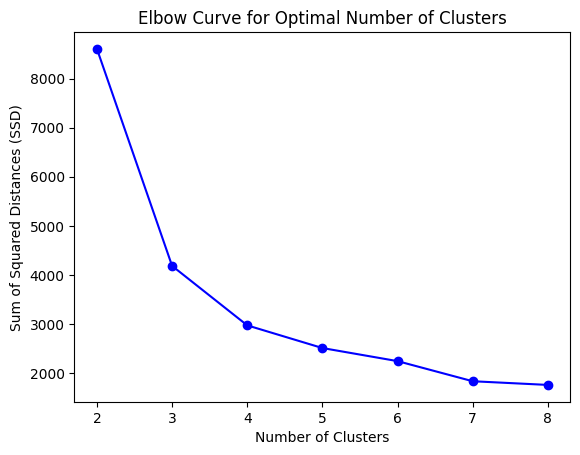

In [59]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd, marker='o', linestyle='-', color='b')  # Add dots to the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.show()

In [60]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5517291718116961
For n_clusters=3, the silhouette score is 0.5116289230379585
For n_clusters=4, the silhouette score is 0.48403980956001613
For n_clusters=5, the silhouette score is 0.44182856626414907
For n_clusters=6, the silhouette score is 0.4093569755004735
For n_clusters=7, the silhouette score is 0.4155058510443169
For n_clusters=8, the silhouette score is 0.40314770991392873


3 It is!

### **Applying Kmeans**

In [67]:
# final model with k=4
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [68]:
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [69]:
# assign the label
rfm['cluster_id'] = kmeans.labels_
rfm.head()

,CustomerID,recency,frequency,monetary,cluster_id
1,12347.0,1,7,4310.00,2
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1
5,12352.0,35,8,2506.04,0


<Axes: xlabel='cluster_id', ylabel='recency'>

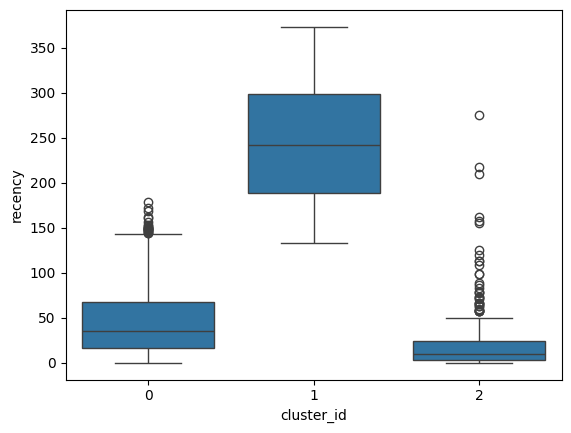

In [70]:
# plot
sns.boxplot(x='cluster_id', y='recency', data=rfm)

<Axes: xlabel='cluster_id', ylabel='frequency'>

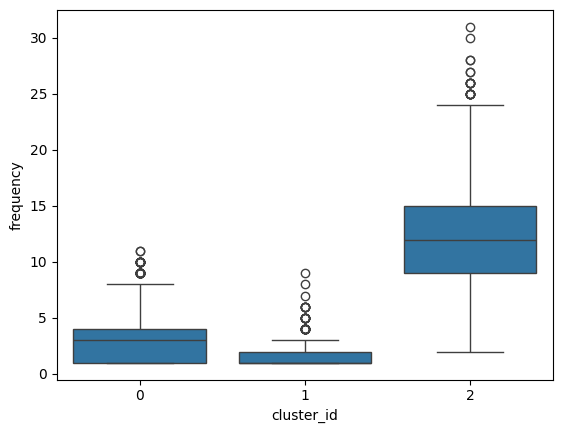

In [71]:
# plot
sns.boxplot(x='cluster_id', y='frequency', data=rfm)

<Axes: xlabel='cluster_id', ylabel='monetary'>

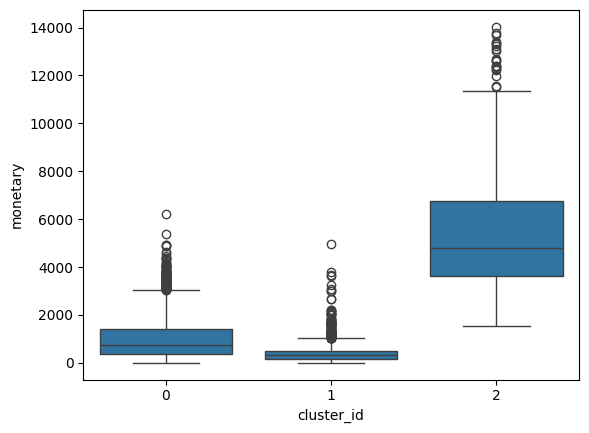

In [72]:
# plot
sns.boxplot(x='cluster_id', y='monetary', data=rfm)

## **Insights and Recommendations**

| **Cluster** | **Characteristics** | **Insights** | **Recommendations** |
|-------------|----------------------|--------------|----------------------|
| **Cluster 0: Moderate Value Customers** | - Moderate monetary value and frequency of purchases. <br> - Recent transactions but not as frequent or high-value as Cluster 2. | - These customers are **moderately valuable and active**. <br> - Show potential to increase in value with the right strategies. | - **Loyalty Programs**: Encourage repeat purchases through loyalty points or discounts. <br> - **Product Bundling**: Offer product bundles to increase transaction value. <br> - **Engagement Campaigns**: Share targeted ads or emails about new products or promotions. |
| **Cluster 1: Low Value and Inactive Customers** | - Low monetary value and frequency of transactions. <br> - Inactive for a significant period. | - Likely **disengaged or one-time customers**. <br> - May require significant effort to reactivate. | - **Re-engagement Campaigns**: Use "We Miss You" promotions to bring them back. <br> - **Targeted Emails**: Provide personalized offers based on past preferences. <br> - **Feedback Collection**: Identify reasons for inactivity and address any issues. |
| **Cluster 2: High-Value and Active Customers** | - High monetary value, frequent purchases, and the most recent transaction dates. | - These are the **most valuable and loyal customers**. <br> - Critical for driving revenue and business success. | - **Retention Strategies**: Offer exclusive rewards, early access to sales, and VIP benefits. <br> - **Feedback and Insights**: Gather input from this cluster to improve products and services. <br> - **Personalized Marketing**: Tailor offers and promotions to their preferences to maintain engagement. |
